# First workbook on Titanic data

## Project Description
To analyze the data provided by the titanic dataset to accurately predict who survives and who does not.

## Data

The titanic data set is a data set found on : 
https://www.kaggle.com/c/titanic/data

## Purpose
We would be making use of this data to get an initial understanding of how to work with data.

So to start with, we know we'll require pandas and numpy, since the data is numeric and stored in a csv.  
Those libraries are imported and the existence of required files are verified.



In [1]:
# Importing required libraries
import matplotlib.pyplot as pyplot
import seaborn
import pandas
import numpy
import os

# Check if files exist
files = []
for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))

print(files)

['./data/actual_result.csv', './data/gender_submission.csv', './data/test.csv', './data/train.csv']


## Loading the data

We load files gender_submission.csv and train.csv to peek at the data.

In [2]:
gender_submission = pandas.read_csv(files[1])
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
train_data = pandas.read_csv(files[3])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


gender_submission.csv is a sample file for submission.
train.csv is the data file we'll be working with.

## Data Description

We describe the data as the following:

| Column | Definition | Keys if any | Numbers of keys |
|------|----------|-----------|-----|
| PassengerId | Key for identifying individual passengers |   | |
| Survived | Tells if a person survived or not | 0 for dead 1 for alive | 2 |
| Pclass | Class of ticket purchased | n for nth class | 3 |
| Name | Name of the passenger | | |
| Sex | The gender of the passenger | | |
| Age | The age of the person | | |
| SibSp | Number of siblings/spouses aboard the titanic | | |
| Parch | Number of parents/children aboard the titanic | | |
| Ticket | Ticket Number | | |
| Fare | The fare for the ticket | | |
| Cabin | The cabin numbers for people with a cabin | | |
| Embarked | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | 3 | 


In [4]:
train_data.shape # Number of rows and number of columns

(891, 12)

Summary : 

| Summary Description | Metric | Comments |
|----|----|----|
| Number of columns | 12 | |
| Categorical Features | 4 | Name, Pclass, Survived, Sex, Embarked |
| Numerical Features | 5 | PassengerID, Age, SibSp, Parch, Fare |



Provided that this data is the actual data of the Titanic, this is bound to be raw unprocessed data.  

We cleanse it and the check the data for errors.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We see in the table above that the max non-null count is 891.

This in turn implies that in the columns Age, Cabin and Embarked, there are discrpancies.
So we find out the details of those.



In [6]:
train_data.describe() # Provides a perspective of numeric data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Transformations for initial data

The categorical data of 'Sex' and 'Embarked' will be changed to numerical values for visulaizations purposes.

The mappings are :

1. For 'Sex' records are going to be changed into 'is_female'. Reason : Women were given preferential treatment, hence should have more initial clarity to provide.

| Value | Represents |
| ----- | ---------- |
|   0   |    male    |
|   1   |   female   |

2. For 'Embarked' we change it to the following mapping, based on the order in which it visited the ports :

| Value |   Represents   |
| ----- | -------------- |
|   1   | Southampton(S) |
|   2   | Cherbourg(C)   |
|   3   | Queenstown(Q)  |


In [7]:
train_data['Sex'] = train_data['Sex'].map({'male' : 0, 'female' : 1})
train_data['Embarked'] = train_data['Embarked'].map({'S' : 1, 'C' : 2, 'Q' : 3})

## Preliminary statistics on the data

### How many people survived in the train data?

In [8]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### How many women and men were there on board in the train data?

In [9]:
train_data['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

### How many people got up from which ports?

In [10]:
train_data['Embarked'].value_counts()

1.0    644
2.0    168
3.0     77
Name: Embarked, dtype: int64

### How many were there of each class of tickets?

In [11]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

We have already listed descriptions for each non-categorical data above, in Data Description section above.

### How many null values do we have?

In [12]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have a lot of discrepancies in 'Cabin', followed by 'Age' and then 'Embarked'.

### Correlations of values

In [13]:
train_data.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.108669
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Correlations in order of significance are :

    1. Sex
    2. Pclass
    3. Fare
    4. Embarked
    5. Parch
    6. Age
    7. SibSp

The values of 'Survived' and 'PassengerId' are inconsequential to our analysis.
'Pclass' amd 'Fare' are principal indicators for the justification of finding which person was at which deck.

'Embarked' will have a bias since people embarking from port 1(Southampton at 644) is the highest.

'Parch' values imply values of 'Parch' in other records, as a parent with 3 children will have the Parch value of 3 whereas the children will have 2 if both parents are onboard.  
This creates an exaggerated correlation.  
The correlation of the values can be approximated through halving.  
This lowers it's importance below 'Age'.

There is a similar scenario of exaggerated correlation that occurs with 'SibSp'.

'Age' becomes a rather important factor due to it not having any correlative exaggerations.

The order of significance then is : 

    1. Sex
    2. Pclass
    3. Fare
    4. Age
    5. Parch
    6. SibSp
    7. Embarked


## Cleaning the Data

We need to take care of discrepant data, some of which has already presented itself to us in the table above.

So we shall first see what all discrepancies exist.

In [14]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have null values in columns 'Age', 'Cabin' and 'Embarked'.

We look into column 'Embarked' the first. Reason being that it's the smallest.

### Cleaning up 'Embarked'

In [15]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


It is a suspicion that these people either didn't board, which shouldn't be the case since they are survivors.

The other scenario could be that they have just not been marked, which should only happen at the port where there were the most people.

With that assumption, I believe checking the number of people from each port should reveal the appropriate place to fit them.

In [16]:
train_data['Embarked'].value_counts()

1.0    644
2.0    168
3.0     77
Name: Embarked, dtype: int64

So clearly, we have a significantly large embarkations from Southampton, which far outweigh the embarkations from the other 2 ports together.

Fitting them into it would hence be appropriate.

In [17]:
# updating using record indices
train_data.loc[train_data['Cabin'].eq('B28'), 'Embarked'] = 1
# Verify there exists no null value
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

'Embarked' has been suitably fixed. We shall now look into the other discrepancies.

Fixing 'Age' might take time. It has to be factored using Parch, SibSp and for servants, they have to be estimated.
'Age' is a lesser important value for the reasons that 'Age' would determine :

1. preferential treatment for children
2. Agility of the passenger

However due to the number of factors involved with people, age might have high correlation but can cause overfitting.  
We'll revisit it later.

We work with 'Cabin' first. It has relations to 'Fare' and we would be obtaining the deck people were at.  
This directly has an influence as to where the people were and how close were they to the Lifeboats, which were at deck A.  
We need to find the people who were made to live in lower quarters, where their tickets were associated with upper cabins as well.

### Cleaning up 'Cabin'

The reason for having those many discrepant records, should be due to either unavailability or the fact that lots didn't travel in cabins.

This should present itself in 2 ways.

1. Exhorbitant prices for tickets with no seats.
2. Tickets significantly cheaper than tickets with cabins.

To show this, we first check a density mapping to see the distribution for discrepant records.

In [18]:
discrepant_cabin_df = train_data[train_data['Cabin'].isnull()]
discrepant_cabin_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            158
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [19]:
discrepant_cabin_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,687.000000,687.000000,687.000000,687.000000,529.000000,687.000000,687.000000,687.000000,687.000000
mean,443.208151,0.299854,2.639010,0.315866,27.555293,0.547307,0.365357,19.157325,1.356623
std,259.215905,0.458528,0.589602,0.465199,13.472634,1.207492,0.827106,28.663343,0.665286
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,214.500000,0.000000,2.000000,0.000000,19.000000,0.000000,0.000000,7.877100,1.000000
50%,441.000000,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,10.500000,1.000000
75%,664.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,23.000000,1.500000
max,891.000000,1.000000,3.000000,1.000000,74.000000,8.000000,6.000000,512.329200,3.000000


So we have 687 disccrepant records, in the discrepant_cabin_df.  
The distribution of the 'Fare' of the discrepant records : 

<AxesSubplot:ylabel='Density'>

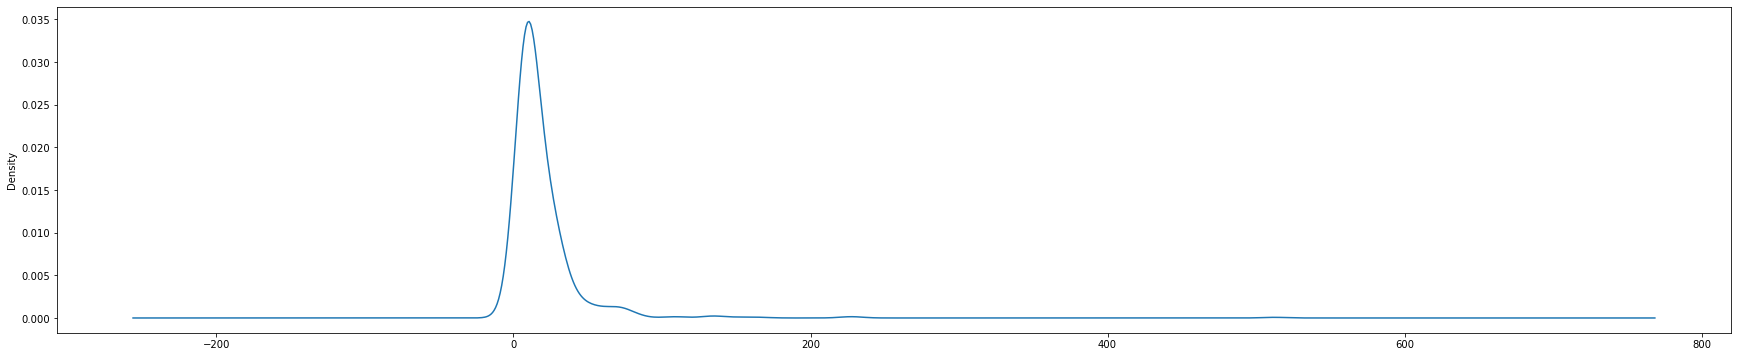

In [20]:
discrepant_cabin_df['Fare'].plot.density(figsize=(30,6))

While the data is focused close to 0(should be closest to 19 since that is where the mean is), we find a small spike after the 200 mark as well.  
This is what we require for digging further into it.  

But is resolving 'Cabin' all that necessary?

Reiterating on the rank of significance of the numerical data, we have the order : 

1. Sex
2. Pclass
3. Fare
4. Age
5. Parch
6. SibSp
7. Embarked

Here, Pclass and Fare are both indicators to which deck an individual was placed on.

The variate that provides distinct information on it is the 'Cabin' number.

With that stated, our next task is to evaluate the density mappings of 'Fare' per 'Pclass'.

This would reveal if there are unnatural distributions, and in an extension grouped outliers in the form of bumps in a kernel density mapping.

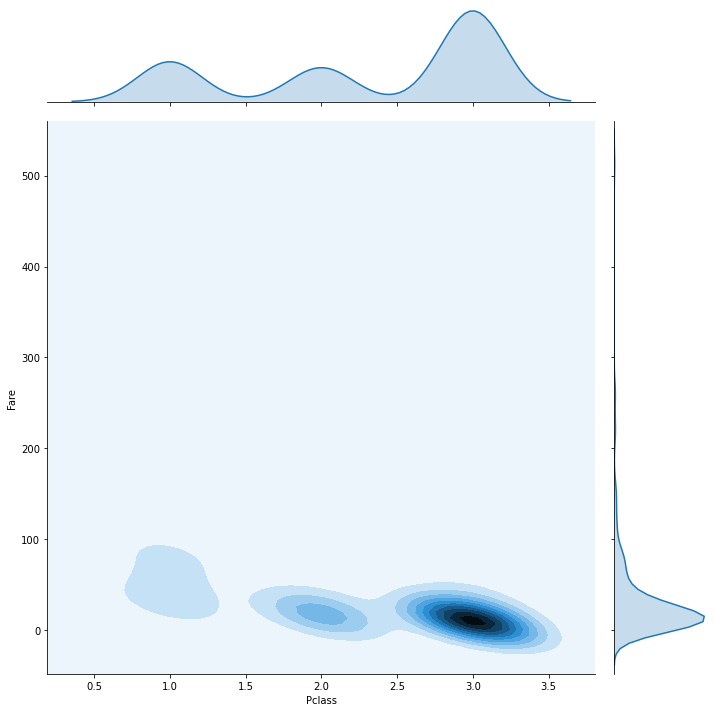

In [21]:
bivariate_df  = train_data[['Pclass','Fare']]
# f, ax = pyplot.subplots(figsize=(30, 30))
seaborn.jointplot(x='Pclass', y='Fare', data=bivariate_df, kind='kde', height=10)

So we can observe that the grouping is distinctively regular. However we know that the max 'Fare' is more than 500.

In [22]:
bivariate_df['Fare'].max() # Max Fare

512.3292

### The cause of unnaturally high 'Fare'?

We check the cases where people pay more than 500, which should provide an insight into the cause.

In [23]:
train_data[train_data['Fare'].ge(500)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",1,35.0,0,0,PC 17755,512.3292,NaN,2.0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,36.0,0,1,PC 17755,512.3292,B51 B53 B55,2.0
737,738,1,1,"Lesurer, Mr. Gustave J",0,35.0,0,0,PC 17755,512.3292,B101,2.0


There are multiple bookings under ticket PC 17755, which cost the same, and the most.

How many people have the same ticket number?

In [24]:
train_data[train_data['Ticket'] == 'PC 17755']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",1,35.0,0,0,PC 17755,512.3292,NaN,2.0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,36.0,0,1,PC 17755,512.3292,B51 B53 B55,2.0
737,738,1,1,"Lesurer, Mr. Gustave J",0,35.0,0,0,PC 17755,512.3292,B101,2.0


What is this PC designation?

In [25]:
train_data[train_data['Ticket'].str.startswith('PC')].sort_values(by='Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
168,169,0,1,"Baumann, Mr. John D",0,NaN,0,0,PC 17318,25.9250,NaN,1.0
512,513,1,1,"McGough, Mr. James Robert",0,36.0,0,0,PC 17473,26.2875,E25,1.0
572,573,1,1,"Flynn, Mr. John Irwin (""Irving"")",0,36.0,0,0,PC 17474,26.3875,E25,1.0
701,702,1,1,"Silverthorne, Mr. Spencer Victor",0,35.0,0,0,PC 17475,26.2875,E24,1.0
707,708,1,1,"Calderhead, Mr. Edward Pennington",0,42.0,0,0,PC 17476,26.2875,E24,1.0
369,370,1,1,"Aubart, Mme. Leontine Pauline",1,24.0,0,0,PC 17477,69.3000,B35,2.0
641,642,1,1,"Sagesser, Mlle. Emma",1,24.0,0,0,PC 17477,69.3000,B35,2.0
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",1,24.0,0,0,PC 17482,49.5042,C90,2.0
527,528,0,1,"Farthing, Mr. John",0,NaN,0,0,PC 17483,221.7792,C95,1.0
309,310,1,1,"Francatelli, Miss. Laura Mabel",1,30.0,0,0,PC 17485,56.9292,E36,2.0


Only commonality is first class tickets, do other first class tickets have designations as well?

In [26]:
train_data[train_data['Pclass'] == 1].sort_values(by='Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",1,30.0,0,0,110152,86.500,B77,1.0
504,505,1,1,"Maioni, Miss. Roberta",1,16.0,0,0,110152,86.500,B79,1.0
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",1,33.0,0,0,110152,86.500,B77,1.0
262,263,0,1,"Taussig, Mr. Emil",0,52.0,1,1,110413,79.650,E67,1.0
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",1,39.0,1,1,110413,79.650,E67,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
537,538,1,1,"LeRoy, Miss. Bertha",1,30.0,0,0,PC 17761,106.425,NaN,2.0
544,545,0,1,"Douglas, Mr. Walter Donald",0,50.0,1,0,PC 17761,106.425,C86,2.0
92,93,0,1,"Chaffee, Mr. Herbert Fuller",0,46.0,1,0,W.E.P. 5734,61.175,E31,1.0
745,746,0,1,"Crosby, Capt. Edward Gifford",0,70.0,1,1,WE/P 5735,71.000,B22,1.0


Not necessarily.  
We split the Ticket into TicketPrefix and TicketNumber.

This might prove to have some correlation later on.

In [27]:
def space_splitting(x):
    space_x = x.rfind(' ')
    try:
        if space_x == -1:
            if x.isalpha():
                return x, None
            else:
                return None, int(x)
        else:
            split_x = [x[:space_x],x[space_x:]]
            return split_x[0], int(split_x[1])
    except Exception as e:
        print(x)
        raise e

train_data_modified = train_data
train_data_modified['TicketPrefix'], train_data_modified['TicketNumber'] = zip(*train_data_modified['Ticket'].map(space_splitting))
# train_data_modified

One more detail we need to createe is the 'DeckNumber' dimension.

We will be fixing the derivations in it.

In [28]:
import math
def get_alphabets(x):
    try:
        temp_x = ''.join([ch for ch in x if ch.isalpha()])
        if len(temp_x) == 0:
            return 'U'
        return temp_x
    except Exception as e:
        return 'U'

train_data_modified['DeckIdentifier'] = train_data_modified['Cabin'].map(get_alphabets)
train_data_modified

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketPrefix,TicketNumber,DeckIdentifier
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,A/5,21171,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0,PC,17599,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,STON/O2.,3101282,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,None,113803,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,None,373450,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1.0,None,211536,U
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1.0,None,112053,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,1.0,W./C.,6607,U
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2.0,None,111369,C


In [29]:
train_data_modified['DeckIdentifier'].value_counts()

U       687
C        51
B        36
D        32
E        32
A        15
F         9
BB        7
CC        4
G         4
CCC       4
FG        3
BBBB      2
BBB       2
DD        1
FE        1
T         1
Name: DeckIdentifier, dtype: int64

Records that have repititions are less in number. We shall make use of that to assign cabins to some memebers.  
There is no easy way of doing this, except manual labour.

However, if we look at the records We see that the values of DeckFloor can be averaged.  
This would not cause problems a there are no records of 'Cabin' being too far apart in terms of 'DeckIdentifer'.

For this very reason we should be able to compute the deck numbers.

In [30]:
def deck_number(x):
    deck_floor_map = { # This is set in the order of suvivability
        'S' : 9,
        'A' : 8, 
        'B' : 7,
        'C' : 6,
        'D' : 5,
        'E' : 4,
        'F' : 3,
        'G' : 2,
        'T' : 1, # This is the tank top deck, which is also the room where the boilers were situated
        'U' : 0
    }
    avg = 0
    n = 0
    for ch in x:
        avg += deck_floor_map[ch]
        n += 1
    avg /= n
    return avg
train_data_modified['DeckNumber'] = train_data_modified['DeckIdentifier'].map(deck_number)
train_data_modified['DeckNumber'].value_counts()

0.0    687
6.0     59
7.0     47
5.0     33
4.0     32
8.0     15
3.0      9
2.0      4
2.5      3
1.0      1
3.5      1
Name: DeckNumber, dtype: int64

These values are what we expected.

Having resolved what we required out of the 'Cabin' it exhausts it's purpose.


### Cleaning up 'Age'

This requires a highly granular approach to fixing it.  
Without getting into extremely fine details, we shall make use of the name title and class.

We shall extract a title, which when used to average the age with class, should allow us to obtain the imputation values to be used in the rest of the cases.

In [31]:
train_data_modified['NamePrefix'] = train_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

It is also an observation that the name lengths of more important people are greater.

Assuming prioritization based on importance, we shall split and store that as well.

In [32]:
train_data_modified['NameLength'] = train_data['Name'].apply(lambda x: len(x))

In [33]:
# Current look of train_data_modified
train_data_modified.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketPrefix,TicketNumber,DeckIdentifier,DeckNumber,NamePrefix,NameLength
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,A/5,21171,U,0.0,Mr.,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0,PC,17599,C,6.0,Mrs.,51
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,STON/O2.,3101282,U,0.0,Miss.,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,None,113803,C,6.0,Mrs.,44
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,None,373450,U,0.0,Mr.,24


## Exploratory Analysis

Checking correlations.

In [34]:
train_data_modified

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketPrefix,TicketNumber,DeckIdentifier,DeckNumber,NamePrefix,NameLength
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,A/5,21171,U,0.0,Mr.,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0,PC,17599,C,6.0,Mrs.,51
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,STON/O2.,3101282,U,0.0,Miss.,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,None,113803,C,6.0,Mrs.,44
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,None,373450,U,0.0,Mr.,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1.0,None,211536,U,0.0,Rev.,21
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1.0,None,112053,B,7.0,Miss.,28
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,1.0,W./C.,6607,U,0.0,Miss.,40
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2.0,None,111369,C,6.0,Mr.,21
